In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 


In [3]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [4]:
cd D:\andres.collazos\Uniandes\Semestre 1\Ciencia de datos aplicada\Labs\lab3

Untitled.ipynb  tips.xls


In [5]:
datos= pd.read_excel("tips.xls")

**1. Usted fue contratado para realizar el análisis estadístico de los datos recolectados. Realice
una inspección del data set y documente los hallazgos.**

In [10]:
pandas_profiling.ProfileReport(datos)

Number of variables,7
Number of observations,244
Total Missing (%),0.0%
Total size in memory,13.4 KiB
Average record size in memory,56.3 B
Numeric,3
Categorical,4
Date,0
Text (Unique),0
Rejected,0
Distinct count,4


El DataSet tiene 3 variables numéricas y 4 categóricas. No hay ningún valor faltante en los datos.  
En cuanto a las variables categóricas tenemos:  
Sexo: Podemos observar que entre los dos valores posibles, hombres y mujeres, se registra más pago de propinas por parte de los hombres.  
Día: Con esta podemos observar que el restaurante solo atiende 4 días de la semana, desde el jueves hasta el domingo.  
Fumador: Es un booleano (si y no) sobre la condición de fumador del que paga la cuenta.   
Tiempo: Como tiempo de comida el restaurante solo registra cena y almuerzo.  
Mientras que por las variables númericas:  
Tamaño: Registra la cantidad de personas en la mesa, los datos se distribuyen entre 1 y 6 personas. A grandes rasgos se puede observar que las personas que asisten al restaurante van en pareja.   
Propina: Podemos observar que las propinas se registran en dolares y están entre 1 y 10 dolares. Es una variable contínua, pues puede tomar cualquier valor real debido a los centavos. También podemos observar que hay datos repetidos en un 50%, por lo que se podría decir que hay personas que consideran dar la misma propina.  
Costo factura: Al igual que la propina se encuentra en dolares, tiene un valor mínimo de 3.07 dolares y un máximo de 50.81. Podemos observar que es un atributo completamente variable.

** 2. Realice un análisis descriptivo de la base de datos. Este debe contener al menos un diagrama
de dispersión, y un diagrama de cajas. ¿Qué hipótesis o reglas de negocio encuentra
congruente con este análisis?**

Se van a realizar un diagrama de dispersión que se considera puede ser relevante para sacar reglas de negocio.  
Se va a utilizar, 'tip' vs 'total' para comprobar si hay algúna relación entre estos atributos y de ser así en que porcentaje se está dando. 

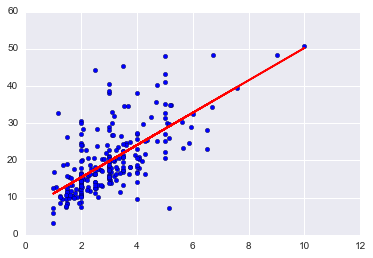

In [8]:
m,b=np.polyfit(datos['tip'],datos['total_bill'],1)
plt.plot(datos['tip'],m*datos['tip']+b, color='red')
plt.scatter(datos['tip'],datos['total_bill'])

Se puede observar que hay algunos datos que efectivamente se encuentran lejos de la regresión, sin embargo si hay una tendencia entre la propina y el total del recibo. Esto puede ser útil para el negocio para realizar control del servicio que se presta, si alguna mesa brinda una propina menor a la recta es posible que tenga inconformidades con el servicio.  
En cuanto al diagrama de cajas, sería interesante ver el comportamiento de la propina por el día separando los hombres de las mujeres y así identificar cuando más se vende.

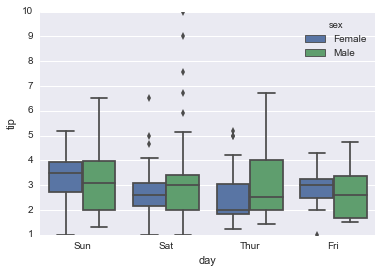

In [9]:
sns.boxplot(y ="tip", x="day", hue='sex', data=datos)

Podemos observar que los jueves es el día que se generan propinas de menor valor, sin embargo, la diferencia entre hombres y mujeres es despreciable. 

**3. ¿Existe una relación entre la propina y el total de la cuenta?**

In [13]:
pearsonr(x= datos.tip , y= datos.total_bill)

(0.67573410921136434, 6.6924706468640407e-34)

Debido a que el valor-p es mucho menor que 0.05 descartamos la hipótesis nula por lo que se acepta el coeficiente r obtenido. Teniendo en cuenta que cuando r=1 es una correlación positiva perfecta, como se obtuvo 0.675 podemos decir que es positiva, entre mayor sea la propina también lo es el total del valor de la factura, sin embargo, está lejos de ser una correlación perfecta por lo que deben haber valores alejados.

**4. ¿Existe relación alguna entre el sexo y la propina?**

In [6]:
pd.value_counts(datos['sex'])

Male      157
Female     87
Name: sex, dtype: int64

Existen casi el doble de registros de propinas otorgadas por hombres, sin embargo eso no significa que por ser hombre exista una mayor probabilidad de que se de una propina, solo que la mayoría de los que pagan las cuentas suelen ser hombres.  
Se procede a realizar una prueba chi cuadrado que muestre si existe una dependencia entre las variables; sin embargo, primero se debe obtener el procentaje que dejan de propina las personas, basado en el valor de la cuenta; para luego convertir la variable de porcentaje (cuantitativa) en una variable cualitativa, que permita realizar una prueba chi cuadrado.  
Para estas conclusiones se va a asumir que una propina alta es superior al 10% del valor de la cuenta, teniendo en cuenta que una propina en Colombia debe rondar el 15% del valor de la cuenta.

In [7]:
propinasCategorizadas = datos
propinasCategorizadas['porcentaje'] = propinasCategorizadas['tip']/propinasCategorizadas['total_bill']
propinasCategorizadas['tipoP'] = np.where(propinasCategorizadas['porcentaje']>0.1, 'Alta', 'Baja')
chi2_contingency(pd.crosstab(index=propinasCategorizadas['sex'],
            columns=propinasCategorizadas['tipoP'], margins=True))

(2.3879980328404988,
 0.66479729597752613,
 4,
 array([[  77.37295082,    9.62704918,   87.        ],
        [ 139.62704918,   17.37295082,  157.        ],
        [ 217.        ,   27.        ,  244.        ]]))

Se puede apreciar que el p-value es 0,66, lo que muestra que la prueba no permite rechazar la hipótesis nula (Existe una relación entre las variables), por lo que no se puede establacer una dependencia entre las variables.

In [16]:
pd.crosstab(index=propinasCategorizadas['tipoP'], columns=propinasCategorizadas['sex']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

sex,Female,Male
tipoP,,
Alta,93.103448,86.624204
Baja,6.896552,13.375796


**5. ¿Existe alguna dependencia entre las variables hora del día y propina?**

In [17]:
chi2_contingency(pd.crosstab(index=propinasCategorizadas['time'],
            columns=propinasCategorizadas['tipoP'], margins=True))

(2.5736035698085034,
 0.63150618444844431,
 4,
 array([[ 156.52459016,   19.47540984,  176.        ],
        [  60.47540984,    7.52459016,   68.        ],
        [ 217.        ,   27.        ,  244.        ]]))

In [18]:
pd.crosstab(index=propinasCategorizadas['tipoP'], columns=propinasCategorizadas['time']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

time,Dinner,Lunch
tipoP,,
Alta,86.931818,94.117647
Baja,13.068182,5.882353


Con la prueba chi cuadrado se puede ver que el *p-value* es muy alto y no se puede establecer una dependencia entre las variables. Y en la tabla cruzada se puede ver que las propinas se dan muy equitativamente tanto en la noche como al medio día.

**6. ¿Existe relación de dependencia entre las variables de dia de la semana y la propina?**  

In [19]:
pd.crosstab(index=propinasCategorizadas['tipoP'], columns=propinasCategorizadas['day']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

day,Fri,Sat,Sun,Thur
tipoP,,,,
Alta,100.0,83.908046,88.157895,93.548387
Baja,0.0,16.091954,11.842105,6.451613


En la tabla cruzada se puede ver que el restaurante sólo abre de jueves a domingo, además que las propinas son similares en todos los días, es decir sin importar que día de la semana sea la propina alta se da entre el 52% y 58% de los casos.

In [20]:
chi2_contingency(pd.crosstab(index=propinasCategorizadas['day'],
                columns=propinasCategorizadas['tipoP'], margins=True))

(5.9853305337585487,
 0.64887517073182144,
 8,
 array([[  16.89754098,    2.10245902,   19.        ],
        [  77.37295082,    9.62704918,   87.        ],
        [  67.59016393,    8.40983607,   76.        ],
        [  55.13934426,    6.86065574,   62.        ],
        [ 217.        ,   27.        ,  244.        ]]))

Igual que en el caso anterior, el *p-value* es muy alto, por lo que la hipótesis nula no se rechaza y no se establece una dependencia entre el día de la semana y el tipo de propina.

** 7. ¿Qué proporción de las propinas son percibidas en los diferentes días de la semana?**

In [21]:
agrupados_dia=datos.groupby('day',as_index=False).sum()
total=datos['tip'].sum()
agrupados_dia['porcentaje']=agrupados_dia['tip']/total
agrupados_dia=agrupados_dia.sort('porcentaje')
agrupados_dia[["day","porcentaje"]]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,day,porcentaje
0,Fri,0.071024
3,Thur,0.234875
2,Sun,0.338159
1,Sat,0.355942


** 8 ¿Existe una relación entre el sexo y su preferencia por fumar? Justifique su respuesta**

In [29]:
pd.crosstab(index=datos['smoker'],
            columns=datos['sex'], margins=True)

sex,Female,Male,All
smoker,,,
No,54,97,151
Yes,33,60,93
All,87,157,244


In [33]:
pd.crosstab(index=datos['smoker'], columns=datos['sex']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

sex,Female,Male
smoker,,
No,62.068966,61.783439
Yes,37.931034,38.216561


In [32]:
chi2_contingency(pd.crosstab(index=datos['smoker'],columns=datos['sex'], margins=True))

(0.001934818536627623,
 0.99999953236133754,
 4,
 array([[  53.84016393,   97.15983607,  151.        ],
        [  33.15983607,   59.84016393,   93.        ],
        [  87.        ,  157.        ,  244.        ]]))

**Hipotesis Nula:** No existe una relacion entre el sexo y la preferencia por fumar  
**R:**
Dado que p > 0,05 el resultado no es significativo, es decir, aceptamos la hipótesis nula de independencia y por lo tanto concluimos que el sexo y la preferencia por fumar son variables independientes

**9.  Seleccione  dos  variables  categóricas  y  realice  una  tabla  de  frecuencias.  Realice  una visualización (gráfica) ¿Qué hipótesis de negocio encuentra congruente con este análisis? **

Primero validamos si las dos variables que seleccionamos ("smoker" y "tipoP") son dependientes, para poder tomar una decisión de negocio con los resultados obtenidos.

In [46]:
chi2_contingency(pd.crosstab(index=datos['smoker'],columns=datos['tipoP'], margins=True))

(10.492621904217167,
 0.032898773212245755,
 4,
 array([[ 134.29098361,   16.70901639,  151.        ],
        [  82.70901639,   10.29098361,   93.        ],
        [ 217.        ,   27.        ,  244.        ]]))

**Hipótesis nula:** no existe relación entre la preferencia por fumar y el tipo de propina.  
**Hipótesis Alternativa:** existe relación entre la preferencia por fumar y el tipo de propina.

**Respueta:**  
Dado que p < 0,05 el resultado es significativo, es decir, rechazamos la hipótesis nula de independencia y por lo tanto concluimos que ambas variables estudiadas son dependientes. Esto significa que podemos aceptar la hipótesis alternativa y si existe una relación entre la preferencia por fumar y si el tipo de propina.


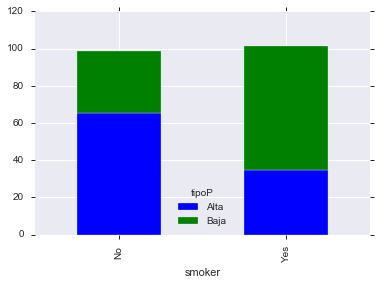

In [57]:
plot = pd.crosstab(index=datos['smoker'],
                   columns=datos['tipoP']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

**Hipótesis de negocio:** Se observa que las personas que **no fuman** son las que en su mayoría dan propinas **Altas**, como también, las personas que **si fuman** son las que en su mayoría dan propinas **bajas.**  
Por lo tanto se propone que: haciendo más pequeña la zona de fumadores y ampliando la zona de no fumadores se aumente la ocurrencia de propinas altas.


**10. Mediante las medidas de asociación y tablas de contingencia vistas en clase responda las siguientes preguntas:**

#### a.  ¿Existe una relación entre el sexo y el día de la semana?   
  
**Hipótesis nula:** no existe relación entre el sexo y el día de la semana.  
**Hipótesis Alternativa:** existe relación entre el sexo y el día de la semana.

In [59]:
pd.crosstab(index=datos['sex'], columns=datos['day']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

day,Fri,Sat,Sun,Thur
sex,,,,
Female,47.368421,32.183908,23.684211,51.612903
Male,52.631579,67.816092,76.315789,48.387097


In [60]:
chi2_contingency(pd.crosstab(index=datos['sex'],columns=datos['day'], margins=True))

(13.222001372406609,
 0.10443609377217977,
 8,
 array([[   6.77459016,   31.0204918 ,   27.09836066,   22.10655738,   87.        ],
        [  12.22540984,   55.9795082 ,   48.90163934,   39.89344262,  157.        ],
        [  19.        ,   87.        ,   76.        ,   62.        ,  244.        ]]))

Dado que el valor p (0.1044) asociado con su estadístico chi-cuadrado es menor que el α seleccionado (0.05), la prueba acepta la hipótesis nula de que las dos variables son independientes.  
  
**Respuesta a:** No existe una relación entre el sexo y el día de la semana

**b.  ¿Existe una relación entre los clientes fumadores y la hora del día?**
  
**Hipótesis nula:** no existe relación entre los clientes fumadores y la hora del día.  
**Hipótesis Alternativa:** existe relación entre los clientes fumadores y la hora del día.

In [56]:
chi2_contingency(pd.crosstab(index=datos['smoker'],columns=datos['time'], margins=True))

(0.73598393932158779,
 0.94681834985643143,
 4,
 array([[ 108.91803279,   42.08196721,  151.        ],
        [  67.08196721,   25.91803279,   93.        ],
        [ 176.        ,   68.        ,  244.        ]]))

Dado que el valor p (0.1044) asociado con su estadístico chi-cuadrado es menor que el α seleccionado (0.05), la prueba acepta la hipótesis nula de que las dos variables son independientes.  
  
**Respuesta b:** No existe una relación entre los clientes fumadores y la hora del día.